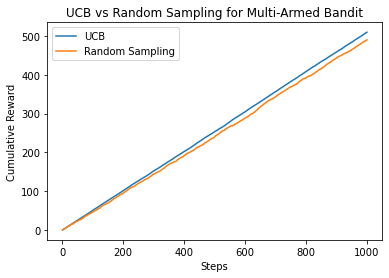

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class UCBBandit:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.mean_rewards = np.zeros(num_arms)
        self.num_pulls = np.zeros(num_arms)
        self.total_pulls = 0

    def select_arm(self):
        exploration_factor = 2.0
        ucb_values = self.mean_rewards + exploration_factor * np.sqrt(np.log(self.total_pulls + 1) / (self.num_pulls + 1e-5))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.num_pulls[chosen_arm] += 1
        self.total_pulls += 1
        current_mean = self.mean_rewards[chosen_arm]
        self.mean_rewards[chosen_arm] = (current_mean * (self.num_pulls[chosen_arm] - 1) + reward) / self.num_pulls[chosen_arm]

def random_sampling(num_steps):
    return np.random.rand(num_steps)

def ucb_simulation(num_arms, num_steps):
    ucb_bandit = UCBBandit(num_arms)
    rewards = []

    for _ in range(num_steps):
        chosen_arm = ucb_bandit.select_arm()

        # Simulate reward (you can replace this with your own reward function)
        reward = np.random.normal(loc=0.5, scale=0.1)

        ucb_bandit.update(chosen_arm, reward)
        rewards.append(reward)

    return rewards

def main():
    num_arms = 5  # You can change the number of arms
    num_steps = 1000  # You can change the number of steps

    # UCB Simulation
    ucb_rewards = ucb_simulation(num_arms, num_steps)

    # Random Sampling Simulation
    random_rewards = random_sampling(num_steps)

    # Plot cumulative rewards over time
    cumulative_ucb_rewards = np.cumsum(ucb_rewards)
    cumulative_random_rewards = np.cumsum(random_rewards)

    plt.plot(np.arange(1, num_steps + 1), cumulative_ucb_rewards, label='UCB')
    plt.plot(np.arange(1, num_steps + 1), cumulative_random_rewards, label='Random Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.legend()
    plt.title('UCB vs Random Sampling for Multi-Armed Bandit')
    plt.show()

if __name__ == "__main__":
    main()
